In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
import pandas_datareader as dr

In [2]:
#Get's the Stock Sticker the user wants

user_stock = input("Pick a Stock's Sticker: ")
user_stock = user_stock.upper()
print(user_stock)

Pick a Stock's Sticker: mmm
MMM


In [3]:
#Gets stock price over a certain of time the user wants

start_time = input('What is the Start Time for Stock Prices (Use Year/Month/Day Format): ') 
end_time  = input('What is the End Time for Stock Prices (Use Year/Month/Day Format): ')

start_time2 = pd.to_datetime(start_time,yearfirst = True)
end_time2 = pd.to_datetime(start_time,yearfirst = True)

start_time2 = str(start_time2)
end_time2 = str(end_time2)

stock_prices = dr.data.get_data_yahoo('{}'.format(user_stock), start = '{}'.format(start_time),end = '{}'.format(end_time))
stock_prices

What is the Start Time for Stock Prices (Use Year/Month/Day Format): 2018/07/07
What is the End Time for Stock Prices (Use Year/Month/Day Format): 2019/07/07


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-09,200.839996,198.070007,198.139999,200.529999,1967100.0,194.818405
2018-07-10,202.580002,200.389999,201.000000,201.479996,1688700.0,195.741333
2018-07-11,199.820007,197.490005,199.820007,197.679993,1853100.0,192.049576
2018-07-12,200.000000,197.399994,199.169998,199.320007,1733500.0,193.642868
2018-07-13,201.789993,200.000000,200.270004,201.179993,1625400.0,195.449890
2018-07-16,201.580002,200.080002,201.550003,201.110001,1468000.0,195.381866
2018-07-17,203.070007,200.130005,200.990005,202.070007,1920600.0,196.314545
2018-07-18,203.169998,201.350006,202.220001,202.199997,1945000.0,196.440826
2018-07-19,202.289993,199.509995,201.759995,201.600006,2616400.0,195.857941


In [4]:
#This function removes the , and make the numbers into integers, good for future use     
def remove_comma_make_integer(x,y):
    for value in x:
        value = value.replace(',','')
        value = int(value)
        y.append(value)
    return y

In [5]:
def make_ratio(first_list,second_list,empty_list):
    for inte in range(4):
        tempRatio = round((first_list[inte]/second_list[inte]),3)
        empty_list.append(tempRatio)
        
    return empty_list

In [6]:
def pricegraph_dec(x):
    Sword = '{}'.format(x)
    plt.title(Sword+' Stock Price Over time')
    plt.xlabel('Dates')
    plt.ylabel('Prices')

In [7]:
def balance_sheet_single_graph(x,years,name):
    plt.title('{}'.format(name))
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.bar(years,x,color = 'darkgreen')
    

In [8]:
def hundred_multiplier(the_list,empty):
    for i in the_list:
        i2 = round((i * 100),3)
        empty.append(i2)
    return empty

In [9]:
#Web Scrapes the Balance Sheet that is for Annual Data

#Requests balance sheet data from yahoo finance

bs_search = 'https://finance.yahoo.com/quote/{0}/balance-sheet?p={0}'.format(user_stock)
balance_sheet_source = requests.get(bs_search).text

#Gets the unparsed balance sheet 

balance_sheet_soup = BeautifulSoup(balance_sheet_source,'lxml')
##print(balance_sheet_soup.prettify()) ; prints whole html code for the webpage that has the balance sheet
balance_sheet = balance_sheet_soup.find('table',class_ = 'Lh(1.7) W(100%) M(0)')
##print(balance_sheet.prettify()) ; 

#Finds the Years on the Balance Sheet, a pattern was found!; remeber that the most current year is index 0

t_years = []

for i in  balance_sheet.find_all('td',class_ ='C($gray) Ta(end)'):
    years = i.span.text
    t_years.append(years)

t_years = pd.to_datetime(t_years)

#Finds the Current Assets

t_currentAssets = []

for i2 in balance_sheet.find_all('td',class_ = 'Fw(600) Fz(s) Ta(end)'):
    currentAssets = i2.span.text
    t_currentAssets.append(currentAssets)
    
ca = []

for casset in t_currentAssets:
    casset = casset.replace(',','')
    casset = int(casset)
    ca.append(casset)
        
#Finds the Total Assets,Total Liabilities, and Net Tangible Assets for latest years

t_Assets = []

for i3 in balance_sheet.find_all('td',class_ = 'Fw(600) Fz(s) Ta(end) Pb(20px)'):
    totalAssets = i3.span.text
    t_Assets.append(totalAssets)
    
TotalAssets = t_Assets[0:4]
TotalLiabilities = t_Assets[4:8]
NetTangibleAssets = t_Assets[8:12]

ta = []
tl = []

tass = remove_comma_make_integer(TotalAssets,ta) 
tlia = remove_comma_make_integer(TotalLiabilities,tl)

#Finds Current Liabilities

cl = []
CurrentLiabilities = 0

for i4 in balance_sheet.find_all('td',class_ = 'Fw(600) Fz(s) Ta(end) Py(8px)'):
    CurrentLiabilities = i4.span.text
    cl.append(CurrentLiabilities)
    
useless = []
currentl = remove_comma_make_integer(cl,useless)
      
#Finds Stock Holder Equity

she = []
xvalue = 0

for i5 in balance_sheet.find_all('td',class_ = 'Fz(s) Ta(end) Pstart(10px)'):
    xvalue = i5.span
    she.append(xvalue)
    
first_ste = she[112].text
second_ste = she[113].text
third_ste = she[114].text
last_ste = she[115].text

stockHolderEquity = [first_ste,second_ste,third_ste,last_ste]

useless2 = []

StockHolderEquity = remove_comma_make_integer(stockHolderEquity,useless2)

#Finds Cash and Cash Equivalents

cash_e1 = she[0].text
cash_e2 = she[1].text
cash_e3 = she[2].text
cash_e4 = she[3].text

cash_e = [cash_e1,cash_e2,cash_e3,cash_e4]

useless3 = []

CashEquivalents = remove_comma_make_integer(cash_e,useless3)

#Finds Long Term Debt

LongDebt1 = she[60].text
LongDebt2 = she[61].text
LongDebt3 = she[62].text
LongDebt4 = she[63].text

LongDebt = [LongDebt1,LongDebt2,LongDebt3,LongDebt4]

useless4 = []

Long_Debt = remove_comma_make_integer(LongDebt,useless4)

#Finds Inventory

inventory1 = she[12].text
inventory2 = she[13].text
inventory3 = she[14].text
inventory4 = she[15].text

inventory = [inventory1,inventory2,inventory3,inventory4]

useless5 = []

Inventory = remove_comma_make_integer(inventory,useless5)

#Finds Accounts Payable 

ap1 = she[48].text
ap2 = she[49].text
ap3 = she[50].text
ap4 = she[51].text

ap = [ap1,ap2,ap3,ap4]

useless6 = []

Acc_Pay = remove_comma_make_integer(ap,useless6)

#Finds Net Receivables

try: 
    netr1 = she[8].text
except Exception:
    netr1 = ',0'
try: 
    netr2 = she[9].text
except Exception:
    netr2 = ',0'       
try:
    netr3 = she[10].text
except Exception:
    netr3 = ',0'
try:
    netr4 = she[11].text
except Exception:
    netr4 = ',0'

net_receivables = [netr1,netr2,netr3,netr4]

useless7 = []

NetReceivables = remove_comma_make_integer(net_receivables,useless7)


#Short Term Debt

try:
    stdebt1 = she[52].text
except Exception:
    stdebt1 = '0'
try:
    stdebt2 = she[53].text
except Exception:
    stdebt2 = '0'
try :
    stdebt3 = she[54].text
except Exception:
    stdebt3 = '0'
#There was a stock(MO) that does not have a value for theshort term debt for third year, so used try and except, if
#there is a 0, it means there is not a reported short term debt reported
try:
    stdebt4 = she[55].text
except Exception:
    stdebt4 = '0'

short_term_debt = [stdebt1,stdebt2,stdebt3,stdebt4]

useless8 = []

ShortTermDebt = remove_comma_make_integer(short_term_debt,useless8)

#Current Ratio over the Years (Current Assets/ Current Liabilities)

curr_Ratio = []

Curr_Ratio = make_ratio(ca,currentl,curr_Ratio)
    
#Debt Ratio over the Years

deb_ratio = []

deb_Ratio = make_ratio(tlia,tass,deb_ratio)
    
#Debt to Equity Ratio (Total Liabilities/TotalStockHolderEquity)

equity_ratio = []

Equity_Ratio = make_ratio(tlia,StockHolderEquity,equity_ratio)

#DataFrame, gathers the bits of the Blance sheet to make our ratios for Dividend Investors 

df_b = {'Year':[t_years[0],t_years[1],t_years[2],t_years[3]],
        'Total_Liabilities':[tlia[0],tlia[1],tlia[2],tlia[3]],
       'Total_Assets':[tass[0],tass[1],tass[2],tass[3]],
       'Current_Liabilities':[currentl[0],currentl[1],currentl[2],currentl[3]],
        'Current_Assets':[ca[0],ca[1],ca[2],ca[3]],
       'Total_Stockholder_Equity':[StockHolderEquity[0],StockHolderEquity[1],StockHolderEquity[2],StockHolderEquity[3]],
       'Cash_and_Equivalents':[CashEquivalents[0],CashEquivalents[1],CashEquivalents[2],CashEquivalents[3]],
       'Long_Term_Debt':[Long_Debt[0],Long_Debt[1],Long_Debt[2],Long_Debt[3]],
        'Inventory':[Inventory[0],Inventory[1],Inventory[2],Inventory[3]],
        'Accounts_Payble': [Acc_Pay[0],Acc_Pay[1],Acc_Pay[2],Acc_Pay[3]],
        'Net_Receivables': [NetReceivables[0],NetReceivables[1],NetReceivables[2],NetReceivables[3]],
        'Short_Term_Debt':[ShortTermDebt[0],ShortTermDebt[1],ShortTermDebt[2],ShortTermDebt[3]],
       'Current_Ratio':[Curr_Ratio[0],Curr_Ratio[1],Curr_Ratio[2],Curr_Ratio[3]],
       'Debt_Ratio': [deb_Ratio[0],deb_Ratio[1],deb_Ratio[2],deb_Ratio[3]],
       'Debt_to_Equity_Ratio':[Equity_Ratio[0],Equity_Ratio[1],Equity_Ratio[2],Equity_Ratio[3]]}

balance_sheet_dataframe = pd.DataFrame(df_b)
print(balance_sheet_dataframe)

        Year  Total_Liabilities  Total_Assets  Current_Liabilities  \
0 2018-12-31           26652000      36500000              7244000   
1 2017-12-31           26365000      37987000              7687000   
2 2016-12-31           22563000      32906000              6219000   
3 2015-12-31           21415000      32883000              7118000   

   Current_Assets  Total_Stockholder_Equity  Cash_and_Equivalents  \
0        13709000                   9796000               2853000   
1        14277000                  11563000               3053000   
2        11726000                  10298000               2398000   
3        10986000                  11429000               1798000   

   Long_Term_Debt  Inventory  Accounts_Payble  Net_Receivables  \
0        13428000    4366000          2266000          5123000   
1        12102000    4034000          1945000          4982000   
2        10678000    3385000          1798000          4501000   
3         8754000    3518000          1

In [10]:
#Web Scrapes the Income Statement that is for Annual Data

is_search = 'https://finance.yahoo.com/quote/{0}/financials?p={0}'.format(user_stock)

Income_Statement_Annually_Source = requests.get(is_search).text

Income_Statement_Annually_Soup = BeautifulSoup(Income_Statement_Annually_Source,'lxml')

Income_Statement_Annually = Income_Statement_Annually_Soup.find('table',class_ = 'Lh(1.7) W(100%) M(0)')

#Finds the Years on the Income Statement

isa_year = []
useless8 = []

for i6 in Income_Statement_Annually.find_all('td',class_ = 'C($gray) Ta(end)'):
    isa_years = i6.span.text
    isa_year.append(isa_years)

IncomeStatementA_years = pd.to_datetime(isa_year)

#Finds the Gross Profit, Operating Income, and Annual Net Income from Continuing Ops

ISAthree = []
useless9 = []

for i7 in Income_Statement_Annually.find_all('td',class_ = 'Fw(600) Fz(s) Ta(end) Pb(20px)'):
    ISAthree2 = i7.span.text
    ISAthree.append(ISAthree2)
    
GPOPNCP = remove_comma_make_integer(ISAthree,useless9)

Gross_ProfitA = [GPOPNCP[0],GPOPNCP[1],GPOPNCP[2],GPOPNCP[3]]
Operating_IncomeorLossA = [GPOPNCP[4],GPOPNCP[5],GPOPNCP[6],GPOPNCP[7]]
Net_Income_Continuing_OpsA = [GPOPNCP[8],GPOPNCP[9],GPOPNCP[10],GPOPNCP[11]]

#Finds Net Sales/ Total Revenue; this one contains a lot of data on Income Statement and Cost of Goods Sold

ISATR = []
useless10 = []
uselesss = []

for i8 in Income_Statement_Annually.find_all('td',class_ = 'Fz(s) Ta(end) Pstart(10px)'):
    ISATR2 = i8.span
    ISATR.append(ISATR2)
    
Total_RevenueA = [ISATR[0].text,ISATR[1].text,ISATR[2].text,ISATR[3].text]
TRA = remove_comma_make_integer(Total_RevenueA,useless10)

CGSA = [ISATR[4].text,ISATR[5].text,ISATR[6].text,ISATR[7].text]
CGSA = remove_comma_make_integer(CGSA,uselesss)

#Finds the Net Income

ISNI = []
useless11 = []

for i9 in Income_Statement_Annually.find_all('td',class_ = 'Fw(600) Ta(end) Py(8px) Pt(36px)'):
    ISNI2 = i9.span.text
    ISNI.append(ISNI2)
    
NetIncomeA = [ISNI[0],ISNI[1],ISNI[2],ISNI[3]]
Net_IncomeA = remove_comma_make_integer(NetIncomeA,useless11)

#Operating Profit Marging (Operating Income / Total Revenue) * 100 ; Operating_IncomeorLossA

useless12 = []
useless13 = []

OperatingProfitMargingA = make_ratio(Operating_IncomeorLossA,TRA,useless12)

OPMA = hundred_multiplier(OperatingProfitMargingA,useless13)

# Net Profit Margin (Net Income/Total Revenue) * 100

useless13 = []
useless14 = []

NPMA = hundred_multiplier(make_ratio(Net_IncomeA,TRA,useless14),useless13)

#Gross Profit Margin (Gross Profit / Total Revenue) * 100

useless15 = []
useless16 = []

GPMA = hundred_multiplier(make_ratio(Gross_ProfitA,TRA,useless15),useless16)


#Data Frame Skeleton for Annual Income Statement

skele_annual_is = {'Years':[IncomeStatementA_years[0],IncomeStatementA_years[1],IncomeStatementA_years[2],IncomeStatementA_years[3]],
                  'Gross_Profit':[Gross_ProfitA[0],Gross_ProfitA[1],Gross_ProfitA[2],Gross_ProfitA[3]],
                   'Operating_Income_or_Loss':[Operating_IncomeorLossA[0],Operating_IncomeorLossA[1],Operating_IncomeorLossA[2],Operating_IncomeorLossA[3]],
                  'Net_Income_Continuing_Ops':[Net_Income_Continuing_OpsA[0],Net_Income_Continuing_OpsA[1],Net_Income_Continuing_OpsA[2],Net_Income_Continuing_OpsA[3]],
                  'Total_Revenue':[TRA[0],TRA[1],TRA[2],TRA[3]],
                   'Net_Income':[Net_IncomeA[0],Net_IncomeA[1],Net_IncomeA[2],Net_IncomeA[3]],
                  'Operting_Profit_Margin':[OPMA[0],OPMA[1],OPMA[2],OPMA[3]],
                  'Net_Profit_Margin':[NPMA[0],NPMA[1],NPMA[2],NPMA[3]],
                  'Gross_Profit_Margin':[GPMA[0],GPMA[1],GPMA[2],GPMA[3]],
                  'Cost_of_Goods_Sold':[CGSA[0],CGSA[1],CGSA[2],CGSA[3]]}

Income_StatementA = pd.DataFrame(skele_annual_is)
print(Income_StatementA)

       Years  Gross_Profit  Operating_Income_or_Loss  \
0 2018-12-31      16110000                   6870000   
1 2017-12-31      15688000                   7333000   
2 2016-12-31      14991000                   7112000   
3 2015-12-31      14931000                   7013000   

   Net_Income_Continuing_Ops  Total_Revenue  Net_Income  \
0                    5363000       32765000     5349000   
1                    4869000       31657000     4858000   
2                    5058000       30109000     5050000   
3                    4841000       30274000     4833000   

   Operting_Profit_Margin  Net_Profit_Margin  Gross_Profit_Margin  \
0                    21.0               16.3                 49.2   
1                    23.2               15.3                 49.6   
2                    23.6               16.8                 49.8   
3                    23.2               16.0                 49.3   

   Cost_of_Goods_Sold  
0            16655000  
1            15969000  
2    

In [11]:
#Web Scrapes the Income Statement that is for the past 4 Quarters Data



In [12]:
#Web Scrapes Current Miscellanous Data for Stock

miscellanous_search = 'https://finance.yahoo.com/quote/{0}?p={0}'.format(user_stock)

currentMSource = requests.get(miscellanous_search).text

currentMSoup = BeautifulSoup(currentMSource ,'lxml')

currentMiscellanous = currentMSoup.find('table',class_ = 'W(100%) M(0) Bdcl(c)')

miscellanous_search2 = 'https://www.marketwatch.com/investing/stock/{0}'.format(user_stock)

currentMSource2 = requests.get(miscellanous_search2).text

currentMSoup2 = BeautifulSoup(currentMSource2,'lxml')

currentMiscellanous2 = currentMSoup2.find('ul', class_ = 'list list--kv list--col50')

#Gets the Current Price

currentMiscellnous3 = currentMSoup2.find('h3',class_ = 'intraday__price')
currentPrice = currentMiscellnous3.find('bg-quote',class_ = 'value')

#Today's Open Price

TOPi = currentMiscellanous2.find('li', class_ = 'kv__item')
TOP = TOPi.find('span', class_ = 'kv__value kv__primary')
TOPe = str(TOP.text)
TOPa = TOPe[1:]
TodayOpenPrice = float(TOPa)

#Web Scrapes the Current Market Cap

CurrentMarketCap = currentMiscellanous.find('td',class_ = 'Ta(end) Fw(600) Lh(14px)')
currentMarketCap = CurrentMarketCap.text

#Web Scrapes Current Price Per Share



#Final Print
print('This is {0} current price: '.format(user_stock)+ currentPrice.text)
print("This is today's Open Price: ", TodayOpenPrice)
print("This is {0}'s Market Cap: ".format(user_stock) + currentMarketCap)


This is MMM current price: 172.00
This is today's Open Price:  173.0
This is MMM's Market Cap: 98.867B


Do you want one graph or two graphs(type 1 or 2): 1
Do you want a timeseries graph based on: Open Prices, Closing Prices, High Prices, or Low Prices: Open Prices
Do you want the Data to be differently colored based by: Annually, Quarterly, Monthly, or None: Annually


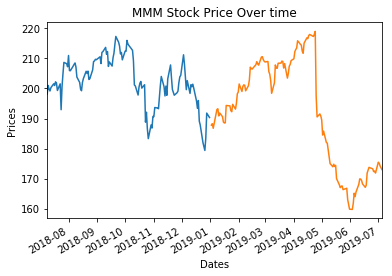

In [13]:
#Line Graph for Stock Prices Over Time

price_graph_choice = input('Do you want one graph or two graphs(type 1 or 2): ')
price_graph_choice = int(price_graph_choice)

if(price_graph_choice == 2):
    user_stock_price_timeseries = input('Do you want a timeseries graph based on: Open Prices, Closing Prices, High Prices, or Low Prices: ')
    user_stock_price_timeseries2 = input('Do you want the 2nd timeseries graph based on: Open Prices, Closing Prices, High Prices, or Low Prices: ')
    user_stock_resampling = input('Do you want the Data to be differently colored based by: Annually, Quarterly, Monthly, or None: ')
else:
    user_stock_price_timeseries = input('Do you want a timeseries graph based on: Open Prices, Closing Prices, High Prices, or Low Prices: ')
    user_stock_resampling = input('Do you want the Data to be differently colored based by: Annually, Quarterly, Monthly, or None: ')
    user_stock_price_timeseries2 = 0 # Have to do this in case user wants only one graph

    
if(user_stock_resampling == 'Annually'):
    line_resample = 'A'
elif(user_stock_resampling == 'Quarterly'):
    line_resample = 'Q'
elif(user_stock_resampling == 'Monthly'):
    line_resample = 'M'
else:
    line_resample = 'lol wut'
    
    
class StockPriceLineGraph:
    def __init__(self,linePrice,lineResample):
        self.linePrice = linePrice
        self.lineResample = lineResample
        
    def OpenPrices(self):
        if((self.linePrice == 'Open Prices') and (self.lineResample == 'A')):
            return stock_prices.Open.resample(line_resample).plot(label = 'Open Prices')
        elif((self.linePrice == 'Open Prices') and (self.lineResample == 'Q')):
            return stock_prices.Open.resample(line_resample).plot(label = 'Open Prices')
        elif((self.linePrice == 'Open Prices') and (self.lineResample == 'M')):
            return stock_prices.Open.resample(line_resample).plot(label = 'Open Prices')
        else:
            return stock_prices.Open.plot(label = 'Open Prices')
        
    def ClosingPrices(self):
        if((self.linePrice == 'Closing Prices') and (self.lineResample == 'A')):
            return stock_prices.Close.resample(line_resample).plot(label = 'Closing Prices')
        elif((self.linePrice == 'Closing Prices') and (self.lineResample == 'Q')):
            return stock_prices.Close.resample(line_resample).plot(label = 'Closing Prices')
        elif((self.linePrice == 'Closing Prices') and (self.lineResample == 'M')):
            return stock_prices.Close.resample(line_resample).plot(label = 'Closing Prices')
        else:
            stock_prices.Open.plot(label = 'Closing Prices')
            
    def HighPrices(self):
        if((self.linePrice == 'High Prices') and (self.lineResample == 'A')):
            return stock_prices.High.resample(line_resample).plot(label = 'High Prices')
        elif((self.linePrice == 'High Prices') and (self.lineResample == 'Q')):
            return stock_prices.High.resample(line_resample).plot(label = 'High Prices')
        elif((self.linePrice == 'High Prices') and (self.lineResample == 'M')):
            return stock_prices.High.resample(line_resample).plot(label = 'High Prices')
        else:
            return stock_prices.High.plot(label = 'High Prices')
        
    def LowPrices(self):
        if((self.linePrice == 'Low Prices') and (self.lineResample == 'A')):
            return stock_prices.Low.resample(line_resample).plot(label = 'Low Prices')
        elif((self.linePrice == 'Low Prices') and (self.lineResample == 'Q')):
            return stock_prices.Low.resample(line_resample).plot(label = 'Low Prices')
        elif((self.linePrice == 'Low Prices') and (self.lineResample == 'M')):
            return stock_prices.Low.resample(line_resample).plot(label = 'Low Prices')
        else:
            return stock_prices.Low.plot(label = 'Low Prices')
        
finalpricegraph1 = StockPriceLineGraph(user_stock_price_timeseries,line_resample)

finalpricegraph2 = 0 # Have to use this in case user wants one graph
finalpricegraph2 = StockPriceLineGraph(user_stock_price_timeseries2,line_resample)

#Time and Price axies and title, x = user_stock
        
prc_dec = pricegraph_dec(user_stock)

#Final Graph execution

if(price_graph_choice == 1):
    if(user_stock_price_timeseries == 'Open Prices'):
        finalpricegraph1.OpenPrices()
        prc_dec
    elif(user_stock_price_timeseries == 'High Prices'):
        finalpricegraph1.HighPrices()
        prc_dec
    elif(user_stock_price_timeseries == 'Closing Prices'):
        finalpricegraph1.ClosingPrices()
        prc_dec
    else:
        finalpricegraph1.LowPrices()
        prc_dec
elif(price_graph_choice == 2):
    if((user_stock_price_timeseries == 'Open Prices' ) and (user_stock_price_timeseries2 == 'Closing Prices')):
        finalpricegraph1.OpenPrices()
        finalpricegraph2.ClosingPrices()
        prc_dec
        plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
    elif((user_stock_price_timeseries == 'Open Prices') and (user_stock_price_timeseries2 == 'High Prices')):
        finalpricegraph1.OpenPrices()
        finalpricegraph2.HighPrices()
        prc_dec
        plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
    elif((user_stock_price_timeseries == 'Open Prices') and (user_stock_price_timeseries2 == 'Low Prices')):
        finalpricegraph1.OpenPrices()
        finalpricegraph2.LowPrices()
        prc_dec
        plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
    elif((user_stock_price_timeseries == 'Closing Prices' ) and (user_stock_price_timeseries2 == 'Open Prices')):
        finalpricegraph1.ClosingPrices()
        finalpricegraph2.OpenPrices()
        prc_dec
        plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
    elif((user_stock_price_timeseries == 'Closing Prices' ) and (user_stock_price_timeseries2 == 'High Prices')):
        finalpricegraph1.ClosingPrices()
        finalpricegraph2.HighPrices()
        prc_dec
        plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
    elif((user_stock_price_timeseries == 'Closing Prices' ) and (user_stock_price_timeseries2 == 'Low Prices')):
        finalpricegraph1.ClosingPrices()
        finalpricegraph2.LowPrices()
        prc_dec
        plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
    elif((user_stock_price_timeseries == 'High Prices') and (user_stock_price_timeseries2 == 'Open Prices')):
        finalpricegraph1.HighPrices()
        finalpricegraph2.OpenPrices()
        prc_dec
        plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
    elif((user_stock_price_timeseries == 'High Prices') and (user_stock_price_timeseries2 == 'Closing Prices')):
        finalpricegraph1.HighPrices()
        finalpricegraph2.ClosingPrices()
        prc_dec
        plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
    elif((user_stock_price_timeseries == 'High Prices') and (user_stock_price_timeseries2 == 'Low Prices')):
        finalpricegraph1.HighPrices()
        finalpricegraph2.LowPrices()
        prc_dec
        plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
    elif((user_stock_price_timeseries == 'Low Prices') and (user_stock_price_timeseries2 == 'Open Prices')):
        finalpricegraph1.LowPrices()
        finalpricegraph2.OpenPrices()
        prc_dec
        plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
    elif((user_stock_price_timeseries == 'Low Prices') and (user_stock_price_timeseries2 == 'Closing Prices')):
        finalpricegraph1.LowPrices()
        finalpricegraph2.ClosingPrices()
        prc_dec
        plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
    elif((user_stock_price_timeseries == 'Low Prices') and (user_stock_price_timeseries2 == 'High Prices')):
        finalpricegraph1.LowPrices()
        finalpricegraph2.HighPrices()
        prc_dec
        plt.legend(bbox_to_anchor=(1.25,1), loc="upper right",fontsize = 'x-small')
    else:
        print('oof, I think you not want to see one kind of pricing graph')
        

In [14]:
#Web Scrapes PE Ratio, EPS, Forward Dividend & Yield, and Ex-Dividend Date

Do you want a graph based on (Accounts Payable vs. Net Receivable, Accounts Payable (Only), Accounts Receivable (Only),Inventory,Short Term Debt (Only), Long Term Debt (Only),Stock Holder Equity, Short Term Debt vs. Long Term Debt),Cash and Equivalents, Current Assets (Only), Total Assets (Only), Total Assets and Current Assets, Current Liabilities (Only), Total Liabilities (Only), Current Liabilities and Total Liabilities, Current Ratio, Debt Ratio, Total Liabilities vs. Total Assets, Current Liabilities vs. Current Assets: Current Assets (Only)


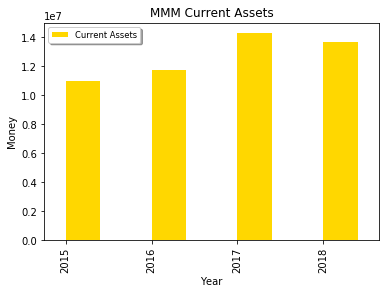

In [15]:
#Graphs based for the Balance Sheet

#Defining variables

tYear = t_years.year
balance_sheet_for_graphs = balance_sheet_dataframe.set_index(tYear)
balance_sheet_for_graphs = balance_sheet_for_graphs[::-1]

#The Graphs for balance sheet

balance_sheet_response = input('Do you want a graph based on (Accounts Payable vs. Net Receivable, Accounts Payable (Only), Accounts Receivable (Only),Inventory,Short Term Debt (Only), Long Term Debt (Only),Stock Holder Equity, Short Term Debt vs. Long Term Debt),Cash and Equivalents, Current Assets (Only), Total Assets (Only), Total Assets and Current Assets, Current Liabilities (Only), Total Liabilities (Only), Current Liabilities and Total Liabilities, Current Ratio, Debt Ratio, Total Liabilities vs. Total Assets, Current Liabilities vs. Current Assets: ')

if(balance_sheet_response == 'Accounts Payable vs. Net Receivable'):
    balance_sheet_for_graphs.Accounts_Payble.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Accounts Payable')
    balance_sheet_for_graphs.Net_Receivables.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Net Receivables')
    plt.title('{} '.format(user_stock) + 'Accounts Payable VS. Net Receivable')
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Accounts Payable (Only)'):
    balance_sheet_for_graphs.Accounts_Payble.plot(kind = 'bar', position = 1,color = 'gold',width = .4,label = 'Accounts Payable')
    plt.title('{} '.format(user_stock) + 'Accounts Payable')
    plt.xlabel('Year')
    plt.ylabel('Year')
    plt.legend(loc = 'best',shadow = True)
elif(balance_sheet_response == 'Accounts Receivable (Only)'):
    balance_sheet_for_graphs.Net_Receivables.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Net Receivables')
    plt.title('{} '.format(user_stock) + 'Net Receivable')
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Inventory'):
    balance_sheet_for_graphs.Net_Receivables.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Net Receivables')
    plt.title('{} '.format(user_stock) + 'Net Receivable')
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Short Term Debt (Only)'):
    balance_sheet_for_graphs.Short_Term_Debt.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Short Term Debt')
    plt.title('{} '.format(user_stock) + 'Short Term Debt')
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Long Term Debt (Only)'):
    balance_sheet_for_graphs.Long_Term_Debt.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Long Term Debt')
    plt.title('{} '.format(user_stock) +'Long Term Debt')
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == "Stock Holder Equity"):
    balance_sheet_for_graphs.Total_Stockholder_Equity.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = "Stock Holder's Equity")
    plt.title('{} '.format(user_stock) +"Stock Holder's Equity")
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Short Term Debt vs. Long Term Debt'):
    balance_sheet_for_graphs.Short_Term_Debt.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Short Term Debt')
    balance_sheet_for_graphs.Long_Term_Debt.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Long Term Debt')
    plt.title('{} '.format(user_stock) + 'Short Term Debt VS. Long Term Debt')
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Cash and Equivalents'):
    balance_sheet_for_graphs.Cash_and_Equivalents.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = "Cash and Equivalents")
    plt.title('{} '.format(user_stock) +"Cash and Equivalents")
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Current Assets (Only)'):
    balance_sheet_for_graphs.Current_Assets.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = "Current Assets")
    plt.title('{} '.format(user_stock) +"Current Assets")
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Total Assets (Only)'):
    balance_sheet_for_graphs.Total_Assets.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = "Total Assets")
    plt.title('{} '.format(user_stock) +"Total Assets")
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Total Assets and Current Assets'):
    balance_sheet_for_graphs.Total_Assets.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Total Assets')
    balance_sheet_for_graphs.Current_Assets.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Current Assets')
    plt.title('{} '.format(user_stock) + 'Total Assets and Current Assets')
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Current Liabilities (Only)'):
    balance_sheet_for_graphs.Current_Liabilities.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = "Current Liabilities")
    plt.title('{} '.format(user_stock) +"Current Liabilities")
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Total Liabilities (Only)'):
    balance_sheet_for_graphs.Total_Liabilities.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = "Total Liabilities")
    plt.title('{} '.format(user_stock) +"Total Liabilities")
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Current Liabilities and Total Liabilities'):
    balance_sheet_for_graphs.Total_Liabilities.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Total Liabilities')
    balance_sheet_for_graphs.Current_Liabilities.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Current Liabilities')
    plt.title('{} '.format(user_stock) + 'Current Liabilities and Total Liabilities')
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Current Ratio'):
    balance_sheet_for_graphs.Current_Ratio.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Current Ratio')
    plt.title('{} '.format(user_stock) + 'Current Ratio')
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Debt Ratio'):
    balance_sheet_for_graphs.Debt_Ratio.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Debt Ratio')
    plt.title('{} '.format(user_stock) + 'Debt Ratio')
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Total Liabilities vs. Total Assets'):
    balance_sheet_for_graphs.Total_Liabilities.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Total Liabilities')
    balance_sheet_for_graphs.Total_Assets.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Total Assets')
    plt.title('{} '.format(user_stock) + 'Total Liabilities vs. Total Assets')
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
elif(balance_sheet_response == 'Current Liabilities vs. Current Assets'):
    balance_sheet_for_graphs.Current_Liabilities.plot(kind = 'bar', position = 1,color = 'darkgreen',width = .4,label = 'Current Liabilities')
    balance_sheet_for_graphs.Current_Assets.plot(kind = 'bar', position = 0,color = 'gold',width = .4,label = 'Current Assets')
    plt.title('{} '.format(user_stock) + 'Current Liabilities vs. Current Assets')
    plt.xlabel('Year')
    plt.ylabel('Money')
    plt.legend(loc = 'best',shadow = True,fontsize = 'small')
else:
    pass

In [16]:
#Graphs for Income Statement(Line Graphs)



In [17]:
# Final Backend Product
#main():
